<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

グラフで日本語を表示するために一度だけ実行

In [ ]:
!pip install japanize-matplotlib

## 例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

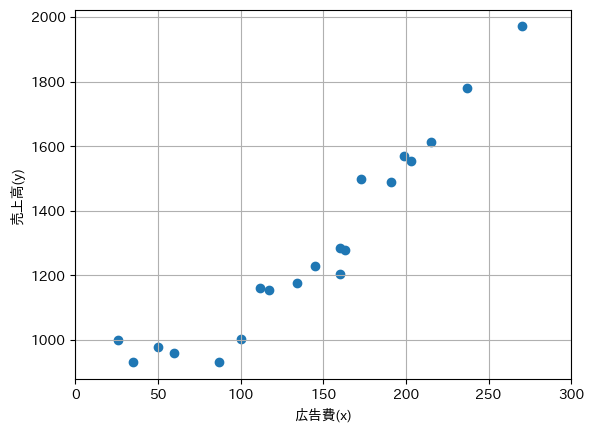

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [173,	191,	134,	100,	117,	112,	35,	87,	203,	50,	26,	163,	270,	160,	160,	60,	199,	237,	215,	145]
y = [1497,	1488,	1176,	1002,	1155,	1161,	933,	930,	1554,	978,	999,	1278,	1971,	1203,	1284,	960,	1569,	1779,	1614,	1230]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("広告費(x)")
plt.ylabel("売上高(y)")
plt.scatter(x, y)

### 線形回帰モデル

y = ax + bのaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

J=1432989


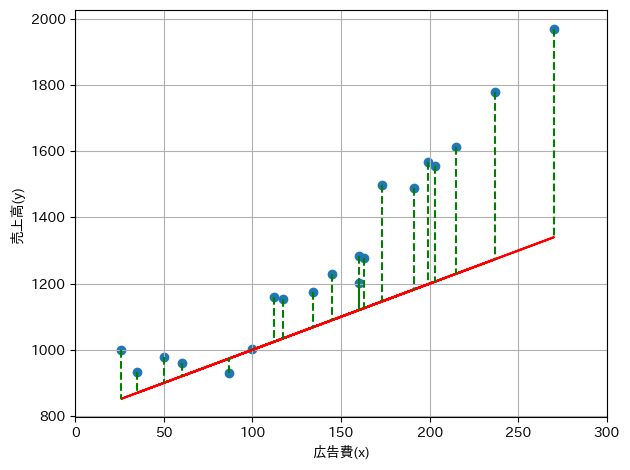

In [44]:
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル

a = 2    # **********この数字を適当に変えてみる**********
b = 800  # **********この数字を適当に変えてみる**********

ylin = [a*i + b for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
axe.plot(x,ylin,color="r")

fig.tight_layout()  # レイアウトの設定
plt.show()

上の図でaとbを変えながら，誤差(ここではJ)を求めよう

In [37]:
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

J=1432989
